In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [27]:
gold = pd.read_csv('gld_price_data.csv')
gold

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [28]:
gold.shape

(2290, 6)

In [29]:
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [30]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [31]:
null_values = gold.isnull().sum()
null_values = null_values[null_values>0]
print(null_values)

Series([], dtype: int64)


In [32]:
object_columns = gold.select_dtypes(include='object').columns
print(object_columns)

Index(['Date'], dtype='object')


In [33]:
gold['Date'] = pd.to_datetime(gold['Date'])

In [34]:
gold.head(60)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180000,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285000,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167000,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053000,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590000,1.557099
5,2008-01-09,1409.130005,86.550003,75.250000,15.520000,1.466405
6,2008-01-10,1420.329956,88.250000,74.019997,16.061001,1.480100
7,2008-01-11,1401.020020,88.580002,73.089996,16.077000,1.479006
8,2008-01-14,1416.250000,89.540001,74.250000,16.280001,1.486900
9,2008-01-15,1380.949951,87.989998,72.779999,15.834000,1.480210


In [35]:
gold = gold.drop('Date', axis=1)

<Axes: >

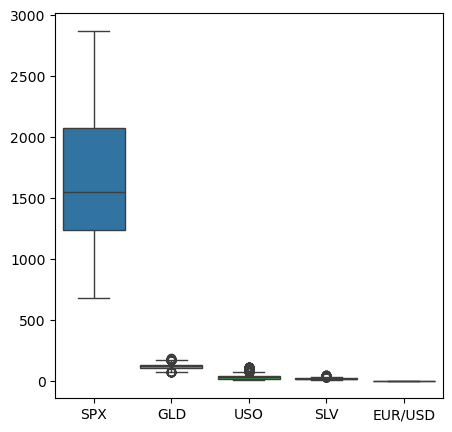

In [36]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data=gold, ax=ax)

In [37]:
#Here, there are no outliers.

In [38]:
correlation = gold.corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

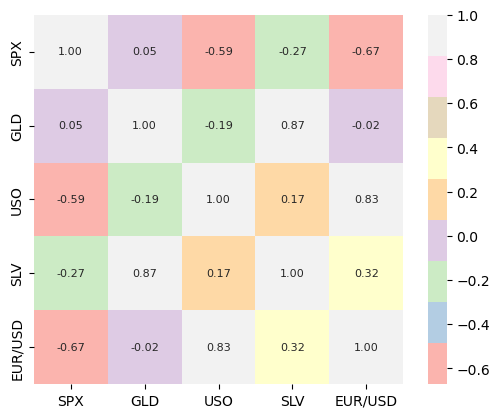

In [39]:
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8},cmap='Pastel1')

In [40]:
x = gold.drop('GLD', axis=1)
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [41]:
y = gold['GLD']
y 

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [43]:
x.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape, y.shape

((2290, 4), (1832, 4), (458, 4), (1832,), (458,), (2290,))

In [44]:
model = DecisionTreeRegressor()

In [45]:
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [46]:
training_data_predict = model.predict(x_train)
training_data_accuracy = metrics.r2_score(training_data_predict, y_train)
print('Accuracy of training data:', training_data_accuracy)

Accuracy of training data: 1.0


In [47]:
testing_data_predict = model.predict(x_test)
testing_data_accuracy = metrics.r2_score(testing_data_predict, y_test)
print('Accuracy of testing data:', testing_data_accuracy)

Accuracy of testing data: 0.9833551102445397


In [48]:
gold.to_csv('cleaned_dataset.csv', index = False)
gold

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2730.129883,124.489998,14.380000,15.5600,1.193118


In [49]:
input_data = (1447.160034,78.370003,15.285,1.474491)		
input_data_as_np = np.asarray(input_data)
input_data_reshaped = input_data_as_np.reshape(1, -1)
prediction = model.predict(input_data_reshaped)
print('Predicted Price of Gold:', prediction[0])

Predicted Price of Gold: 85.57


C:\Users\Nandana\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
